# Scrape COVID-19 data from www.worldometers.info

## Background
The data in this project is taken from www.worldometers.info. The data here is updated on a realtime basis, and renewed every day.
&nbsp;
&nbsp;

## Import Modules
First we import the modules necessary for the scraping of the data

In [1]:
import requests
import lxml.html as lh
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns

In [2]:
url = 'https://www.worldometers.info/coronavirus/'

#Create a handle, page, to handle the contents of the website
page = requests.get(url)

#Store the contents of the website under doc
doc = lh.fromstring(page.content)

#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

In [3]:
#Check the length of the first 10 rows
[len(T) for T in tr_elements[:10]]

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [4]:
#Create empty list
col=[]

i=0

#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print('%d:"%s"'%(i,name))
    col.append((name,[]))

1:"Country,Other"
2:"TotalCases"
3:"NewCases"
4:"TotalDeaths"
5:"NewDeaths"
6:"TotalRecovered"
7:"ActiveCases"
8:"Serious,Critical"
9:"Tot Cases/1M pop"
10:"Tot Deaths/1M pop"


In [184]:
#Since out first row is the header, data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 9, the //tr data is not from our table 
    if len(T)!=9:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        
        #Check if row is empty
        if i>0:
        
        #Convert any numerical value to integers
            try:
                data = data.replace(',', '')
                data = float(data)
            except:
                data = None
        
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        
        #Increment i for the next column
        i+=1

In [196]:
[len(C) for (title,C) in col]

[367, 367, 367, 367, 367, 367, 367, 367, 367]

In [219]:
Dict={title:column for (title,column) in col}
covid_df=pd.DataFrame(Dict)

covid_df['Country,Other'].iloc[366]

'Total:'

In [220]:
# remove the row called Total:
covid_df.drop(366, inplace = True)
covid_df.head()

In [226]:
worst_countries = covid_df[0:10]
worst_countries

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,80967.0,39.0,3248.0,3.0,71150.0,6569.0,2136.0,56.0
1,Italy,41035.0,NaN,3405.0,NaN,4440.0,33190.0,2498.0,679.0
2,Spain,20412.0,2335.0,1041.0,210.0,1588.0,17783.0,939.0,437.0
3,Iran,19644.0,1237.0,1433.0,149.0,6745.0,11466.0,NaN,234.0
4,Germany,17776.0,2456.0,48.0,4.0,180.0,17548.0,2.0,212.0
5,USA,14439.0,650.0,218.0,11.0,125.0,14096.0,64.0,44.0
6,France,10995.0,NaN,372.0,NaN,1295.0,9328.0,1122.0,168.0
7,S. Korea,8652.0,87.0,94.0,3.0,2233.0,6325.0,59.0,169.0
8,Switzerland,4905.0,683.0,50.0,7.0,15.0,4840.0,NaN,567.0
9,UK,3269.0,NaN,144.0,NaN,65.0,3060.0,20.0,48.0


<BarContainer object of 10 artists>

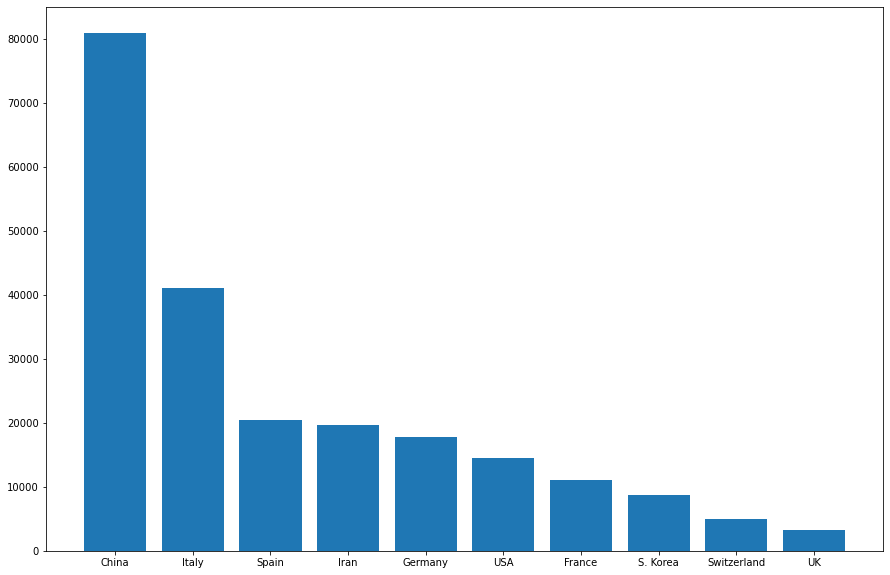

In [243]:
plt.figure(figsize=(15, 10))
plt.bar('Country,Other', 'TotalCases', data = worst_countries)